#House price prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import  LassoCV
from sklearn.linear_model import  RidgeCV
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

Load Dataset

In [ ]:
#load the dataset
from sklearn.datasets import load_boston
data_boston = load_boston()
df_data = pd.DataFrame(data_boston.data , columns= data_boston.feature_names)
df_data['PRICE'] = data_boston.target


In [ ]:
#view the dataset
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#Get the statistical summary of dataset
df_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#check the dimension of the dataset
df_data.shape

(506, 14)

In [ ]:
df_data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

Data Cleaning

In [ ]:
#check for null values
df_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [ ]:
#check Nan value in the dataset
df_data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

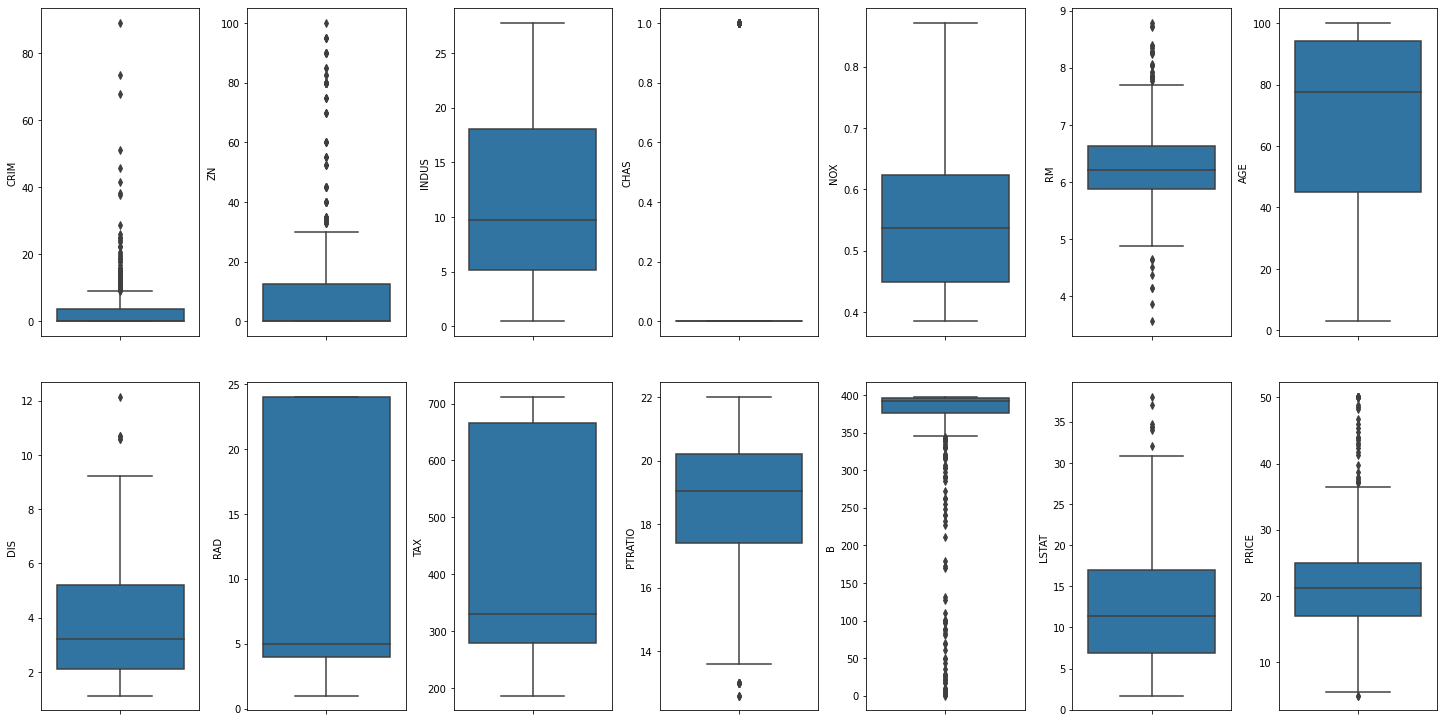

In [ ]:
#boc plot to find outliers
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
count = 0
axs = axs.flatten()
for tar,var in df_data.items():
    sns.boxplot(y=tar, data=df_data, ax=axs[count])
    count = count+1
plt.tight_layout(pad=0.5, w_pad=0.78, h_pad=4.0)

In [ ]:
#outliers in percentage for each feature
for tar,var in df_data.items():
    q1 = var.quantile(0.25)
    q3 = var.quantile(0.75)
    iqr = q3-q1
    var_col = var[(var <= q1-1.5*iqr) | (var >= q3+1.5*iqr)]
    perc = np.shape(var_col)[0]*100.0/np.shape(df_data)[0]
    print("Column %s outliers = %.2f%%" % (tar, perc))             

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column PRICE outliers = 7.91%


Data Visualization

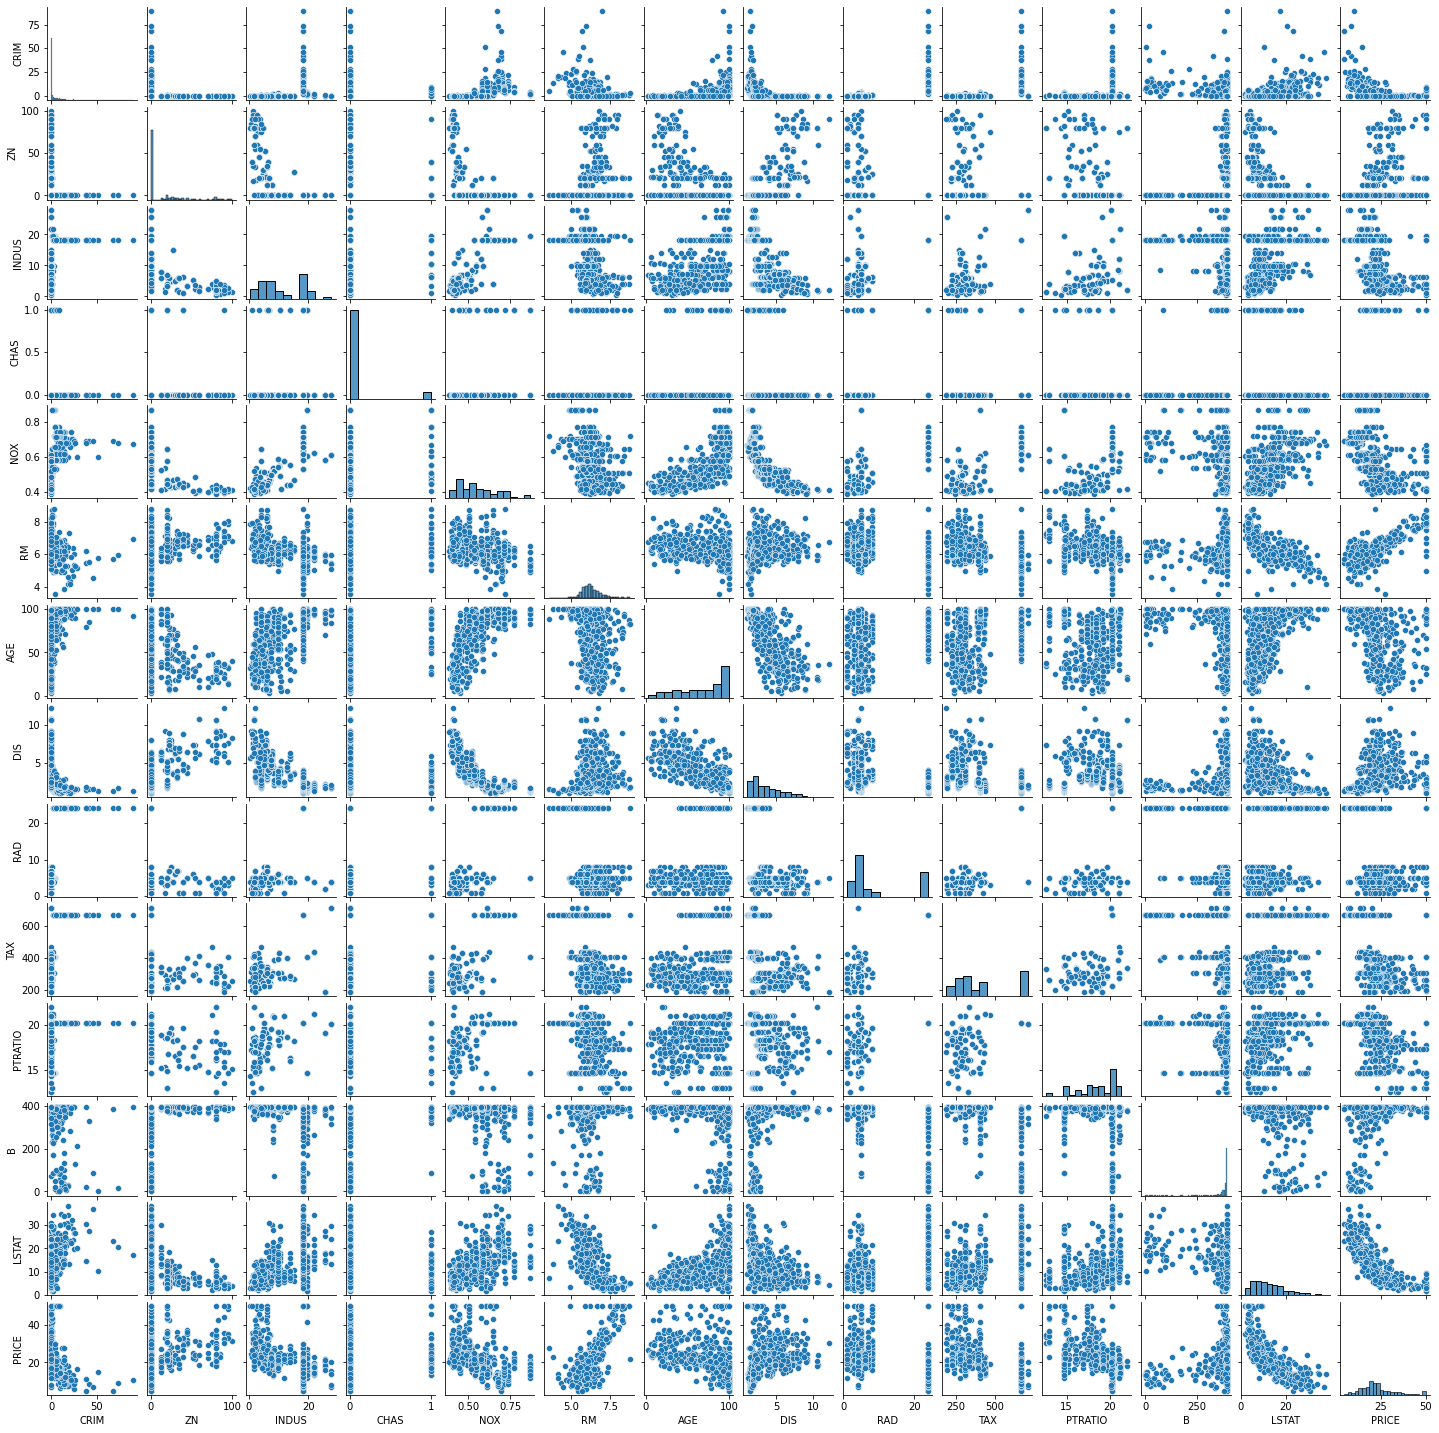

In [ ]:
g = sns.pairplot(df_data)
g.fig.set_size_inches(20,20)


In [ ]:
#CHAS is a categoria variable which can be ignored

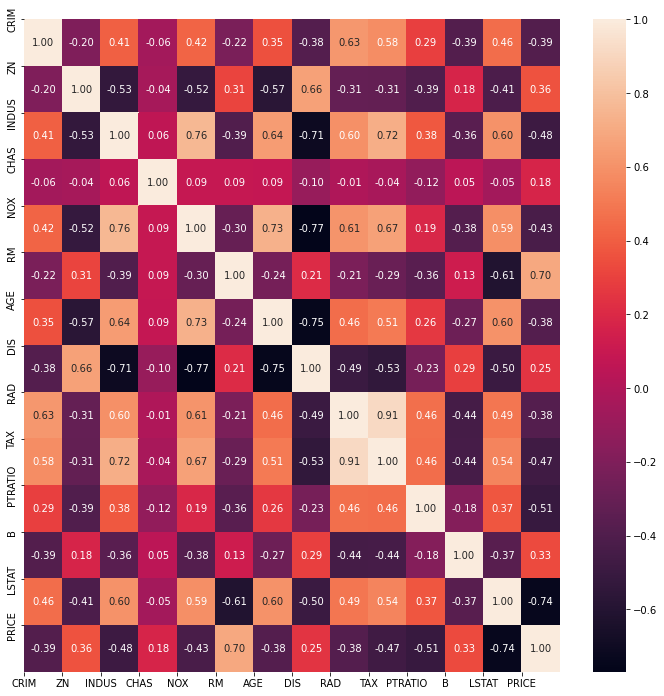

In [ ]:
#correlation plot
cor = df_data.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cor, annot= True, fmt = ".2f")
plt.xticks(range(len(cor.columns)), cor.columns);
plt.yticks(range(len(cor.columns)), cor.columns)
plt.show()

In [ ]:
# lowest correlated feature with respect to the target variables are CHAS and DIS
#Highly corellated features with PRICE(target variable) are LSTAT, PTRATIO, TAX, RM, NOX, INDUS. 

Modelling

In [ ]:
#divide into train and test data set
X = df_data.iloc[:,:13]
Y = df_data.iloc[:,-1]
X = X.drop(['CHAS'], axis =1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.15, random_state =123)

In [ ]:
print(X.shape, Y.shape)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(506, 12) (506,)
(430, 12) (76, 12) (430,) (76,)


In [ ]:
#standardized the data
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 5.49287874e+00, -4.83904043e-01,  1.00251088e+00,
         3.62328856e-01, -7.47347772e-01,  1.11343378e+00,
        -1.12248280e+00,  1.67204583e+00,  1.53208264e+00,
         8.18361374e-01, -3.92859412e+00, -3.74662549e-01],
       [-4.05997100e-01, -4.83904043e-01, -9.60758319e-01,
        -9.05254477e-01,  4.98536081e-01, -4.37536907e-01,
         2.96372290e-01, -7.51870343e-01, -9.56291375e-01,
         2.39096285e-02,  3.78353743e-01, -8.71891310e-01],
       [-4.08488145e-01,  3.73268927e-01, -1.12809059e+00,
        -9.57499465e-01,  2.19681991e+00, -1.40768029e-01,
         4.16928299e-01, -5.21021184e-01, -1.14039542e+00,
        -1.65845877e+00,  3.23204475e-01, -1.25661859e+00],
       [ 9.78785237e-01, -4.83904043e-01,  1.00251088e+00,
         5.07929644e-01, -9.02904863e-01,  6.75346387e-01,
        -8.70018818e-01,  1.67204583e+00,  1.53208264e+00,
         8.18361374e-01, -7.35130981e-01,  1.79511404e-01],
       [-4.08982428e-01,  3.58766756e+00, -1.3963992

Base model with all the variable

In [ ]:
#buid a linear regressiion model 
lm = LinearRegression()
lm_fit = lm.fit(X_train, Y_train)

# Predicting Cross Validation Score the Test set results
lm_cv = cross_val_score(estimator = lm_fit, X = X_train, y = Y_train, cv = 10)

In [ ]:
print("Intercept: ",lm_fit.intercept_)

Intercept:  33.19392132404392


In [ ]:
coeffcients =  pd.DataFrame([X_train.columns, lm_fit.coef_]).T
print(coeffcients)

          0          1
0      CRIM  -0.106137
1        ZN  0.0460227
2     INDUS  0.0607175
3       NOX   -16.7063
4        RM    4.22803
5       AGE -0.0014195
6       DIS   -1.39219
7       RAD   0.304646
8       TAX -0.0136642
9   PTRATIO  -0.944298
10        B  0.0084362
11    LSTAT  -0.505178


In [ ]:
y_pred = lm_fit.predict(X_train)
#Model Evaluation and error calculationsPPrint("Training Data:")
print("Training Data:")
print("CV: ", lm_cv.mean())
print('R^2 =',metrics.r2_score(Y_train, y_pred))
print('Adjusted R^2 =',1 - (1-metrics.r2_score(Y_train, y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE =',metrics.mean_absolute_error(Y_train, y_pred))
print('MSE =',metrics.mean_squared_error(Y_train, y_pred))
print('RMSE =',np.sqrt(metrics.mean_squared_error(Y_train, y_pred)))

Training Data:
CV:  0.7129200169751082
R^2 = 0.7508499100228672
Adjusted R^2 = 0.7436801232609354
MAE = 3.1616587707237396
MSE = 20.58978619474228
RMSE = 4.5375969625719605


In [ ]:
y_pred_test = lm_fit.predict(X_test)
#Model Evaluation and error calculations
print("Test Data:")
print('R^2 =',metrics.r2_score(Y_test, y_pred_test))
print('Adjusted R^2 =',1 - (1-metrics.r2_score(Y_test, y_pred_test))*(len(Y_test)-1)/(len(Y_test)- X_test.shape[1]-1))
print('MAE =',metrics.mean_absolute_error(Y_test, y_pred_test))
print('MSE =',metrics.mean_squared_error(Y_test, y_pred_test))
print('RMSE =',np.sqrt(metrics.mean_squared_error(Y_test, y_pred_test)))

Test Data:
R^2 = 0.6496182460122595
Adjusted R^2 = 0.5828788643003089
MAE = 3.805700816613534
MSE = 32.69434166642553
RMSE = 5.717896612079089


Linear regression with feature selection

In [ ]:
#remove 'AGE', 'B' features as they are very low coeefficient and the correlation plot also show they are not highly correlated with price
X_train_new =  X_train.drop([ 'AGE', 'B'], axis = 1)
X_test_new = X_test.drop([ 'AGE', 'B'], axis = 1)


In [ ]:
print(X_train_new.shape, X_test_new.shape)
X_train

(430, 10) (76, 10)


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
376,15.28800,0.0,18.10,0.671,6.649,93.3,1.3449,24.0,666.0,20.2,363.02,23.24
49,0.21977,0.0,6.91,0.448,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
308,0.49298,0.0,9.90,0.544,6.635,82.5,3.3175,4.0,304.0,18.4,396.90,4.54
374,18.49820,0.0,18.10,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97
227,0.41238,0.0,6.20,0.504,7.163,79.9,3.2157,8.0,307.0,17.4,372.08,6.36
...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08187,0.0,2.89,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
476,4.87141,0.0,18.10,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
322,0.35114,0.0,7.38,0.493,6.041,49.9,4.7211,5.0,287.0,19.6,396.90,7.70
382,9.18702,0.0,18.10,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60


In [ ]:
#buid a linear regressiion model 
lm1 = LinearRegression()
lm_fit1 = lm1.fit(X_train_new, Y_train)

# Predicting Cross Validation Score the Test set results
lm_cv1 = cross_val_score(estimator = lm_fit1, X = X_train_new, y = Y_train, cv = 10)

In [ ]:
print("Intercept: ",lm_fit1.intercept_)

Intercept:  37.83238827535931


In [ ]:
coeffcients =  pd.DataFrame([X_train_new.columns, lm_fit1.coef_]).T
print(coeffcients)

         0          1
0     CRIM  -0.109695
1       ZN  0.0463313
2    INDUS  0.0558336
3      NOX   -17.4375
4       RM    4.09272
5      DIS   -1.41996
6      RAD   0.281676
7      TAX  -0.013896
8  PTRATIO  -0.922862
9    LSTAT  -0.534265


In [ ]:
Y_pred1 = lm_fit1.predict(X_train_new)
#Model Evaluation and error calculationsPPrint("Training Data:")
print("Training Data:")
print("CV: ", lm_cv1.mean())
print('R^2 =',metrics.r2_score(Y_train, Y_pred1))
print('Adjusted R^2 =',1 - (1-metrics.r2_score(Y_train, Y_pred1))*(len(Y_train)-1)/(len(Y_train)- X_train_new.shape[1]-1))
print('MAE =',metrics.mean_absolute_error(Y_train, Y_pred1))
print('MSE =',metrics.mean_squared_error(Y_train, Y_pred1))
print('RMSE =',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred1)))

Training Data:
CV:  0.7090311875849938
R^2 = 0.7456196184667336
Adjusted R^2 = 0.7395484876425507
MAE = 3.239084827905173
MSE = 21.022017966710884
RMSE = 4.584977422704596


In [ ]:
Y_pred_test = lm_fit1.predict(X_test_new)
#Model Evaluation and error calculations(Test Data)
print("Test Data:")
print('R^2 =',metrics.r2_score(Y_test, Y_pred_test))
print('Adjusted R^2 =',1 - (1-metrics.r2_score(Y_test, Y_pred_test))*(len(Y_test)-1)/(len(Y_test)- X_test_new.shape[1]-1))
print('MAE =',metrics.mean_absolute_error(Y_test, Y_pred_test))
print('MSE =',metrics.mean_squared_error(Y_test, Y_pred_test))
print('RMSE =',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test)))

Test Data:
R^2 = 0.6341329515123987
Adjusted R^2 = 0.577845713283537
MAE = 3.981964491044429
MSE = 34.13928422813604
RMSE = 5.842883211919954


In [ ]:
#Same performance can be achived with fewer features an d havng almost similiar performance

Ridge Regession


In [ ]:
#This model enforce regularization 
lm_ridgecv= RidgeCV(alphas = [0.001, 0.01 , 0.1, 1.0, 2 , 3 , 5 ,10.0])
lm_ridgecv.fit(X_train, Y_train)

RidgeCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 2.e+00, 3.e+00, 5.e+00, 1.e+01]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [ ]:
lm_ridgecv.alpha_

0.01

In [ ]:
print("Intercept: ",lm_ridgecv.intercept_)

Intercept:  33.10246156764522


In [ ]:
coeffcients =  pd.DataFrame([X_train.columns, lm_ridge.coef_]).T
print(coeffcients)

          0           1
0      CRIM   -0.102887
1        ZN   0.0456442
2     INDUS   0.0546809
3       NOX     1.60657
4        RM    -16.9146
5       AGE      4.2061
6       DIS -0.00252926
7       RAD    -1.38929
8       TAX    0.292451
9   PTRATIO  -0.0129028
10        B   -0.927455
11    LSTAT  0.00806087
12      NaN   -0.505744


In [ ]:
Y_pred_ridgecv = lm_ridgecv.predict(X_train)
#Model Evaluation and error calculationsPPrint("Training Data:")
print("Training Data:")
print('R^2 =',metrics.r2_score(Y_train, Y_pred_ridgecv))
print('Adjusted R^2 =',1 - (1-metrics.r2_score(Y_train, Y_pred_ridgecv))*(len(Y_train)-1)/(len(Y_train)- X_train.shape[1]-1))
print('MAE =',metrics.mean_absolute_error(Y_train, Y_pred_ridgecv))
print('MSE =',metrics.mean_squared_error(Y_train, Y_pred_ridgecv))
print('RMSE =',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_ridgecv)))

Training Data:
R^2 = 0.7508493337555588
Adjusted R^2 = 0.7436795304103951
MAE = 3.16098718209097
MSE = 20.589833817525278
RMSE = 4.537602210146376


In [ ]:
Y_pred_ridgecv_test = lm_ridgecv.predict(X_test)
#Model Evaluation and error calculationsPPrint("Test Data:")
print("Test Data:")
print('R^2 =',metrics.r2_score(Y_test, Y_pred_ridgecv_test))
print('Adjusted R^2 =',1 - (1-metrics.r2_score(Y_test, Y_pred_ridgecv_test))*(len(Y_test)-1)/(len(Y_test)- X_test.shape[1]-1))
print('MAE =',metrics.mean_absolute_error(Y_test, Y_pred_ridgecv_test))
print('MSE =',metrics.mean_squared_error(Y_test,Y_pred_ridgecv_test))
print('RMSE =',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_ridgecv_test)))

Test Data:
R^2 = 0.6495805683023316
Adjusted R^2 = 0.5828340098837281
MAE = 3.8051241993799945
MSE = 32.69785739721793
RMSE = 5.71820403599049


Lasso Reression

In [ ]:
lm_lassocv= LassoCV(alphas = [0.0001, 0.0015,0.001, 0.01 , 0.1, 1.0, 2 , 3 , 5 ,10.0])
lm_lassocv.fit(X_train, Y_train)

LassoCV(alphas=[0.0001, 0.0015, 0.001, 0.01, 0.1, 1.0, 2, 3, 5, 10.0],
        copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [ ]:
lm_lassocv.alpha_

0.0001

In [ ]:
print("Intercept: ",lm_lassocv.intercept_)

Intercept:  33.17079791665047


In [ ]:
coeffcients =  pd.DataFrame([X_train.columns, lm_lassocv.coef_]).T
print(coeffcients)

          0           1
0      CRIM   -0.106124
1        ZN   0.0460264
2     INDUS    0.060564
3       NOX    -16.6737
4        RM     4.22817
5       AGE  -0.0014486
6       DIS     -1.3917
7       RAD    0.304552
8       TAX  -0.0136659
9   PTRATIO   -0.943902
10        B  0.00843766
11    LSTAT   -0.505207


In [ ]:
Y_pred_lassocv = lm_lassocv.predict(X_train)
#Model Evaluation and error calculationsPPrint("Training Data:")
print("Training Data:")
#print("CV: ", cv_ridge.mean())
print('R^2 =',metrics.r2_score(Y_train, Y_pred_lassocv))
print('Adjusted R^2 =',1 - (1-metrics.r2_score(Y_train, Y_pred_lassocv))*(len(Y_train)-1)/(len(Y_train)- X_train.shape[1]-1))
print('MAE =',metrics.mean_absolute_error(Y_train, Y_pred_lassocv))
print('MSE =',metrics.mean_squared_error(Y_train, Y_pred_lassocv))
print('RMSE =',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_lassocv)))

Training Data:
R^2 = 0.7508498693414954
Adjusted R^2 = 0.7436800814088766
MAE = 3.1614775336742875
MSE = 20.58978955665455
RMSE = 4.537597333022681


In [ ]:
Y_pred_lassocv_test = lm_lassocv.predict(X_test)
#Model Evaluation and error calculationsPPrint("Test Data:")
print("Test Data:")
print('R^2 =',metrics.r2_score(Y_test, Y_pred_lassocv_test))
print('Adjusted R^2 =',1 - (1-metrics.r2_score(Y_test, Y_pred_lassocv_test))*(len(Y_test)-1)/(len(Y_test)- X_test.shape[1]-1))
print('MAE =',metrics.mean_absolute_error(Y_test, Y_pred_lassocv_test))
print('MSE =',metrics.mean_squared_error(Y_test,Y_pred_lassocv_test))
print('RMSE =',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_lassocv_test)))

Test Data:
R^2 = 0.6496101218319461
Adjusted R^2 = 0.5828691926570787
MAE = 3.805553538935985
MSE = 32.69509973879631
RMSE = 5.717962901138509


Linear regression with polynomial expansion

In [ ]:

poly_reg = PolynomialFeatures(degree = 2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)
lm_poly2 = LinearRegression()
lm_poly2.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_pred_lm_poly = lm_poly2.predict(X_train_poly)
#Model Evaluation and error calculationsPPrint("Training Data:")
print("Training Data:")
print('R^2 =',metrics.r2_score(Y_train, Y_pred_lm_poly))
print('Adjusted R^2 =',1 - (1-metrics.r2_score(Y_train, Y_pred_lm_poly))*(len(Y_train)-1)/(len(Y_train)- X_train.shape[1]-1))
print('MAE =',metrics.mean_absolute_error(Y_train, Y_pred_lm_poly))
print('MSE =',metrics.mean_squared_error(Y_train, Y_pred_lm_poly))
print('RMSE =',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_lm_poly)))

Training Data:
R^2 = 0.9290594487961842
Adjusted R^2 = 0.927017994085283
MAE = 1.8030056802909675
MSE = 5.862533631666733
RMSE = 2.4212669476261253


In [ ]:

Y_pred_lm_poly_test = lm_poly2.predict(X_test_poly)
#Model Evaluation and error calculationsPPrint("Test Data:")
print("Test Data:")
print('R^2 =',metrics.r2_score(Y_test, Y_pred_lm_poly_test))
print('Adjusted R^2 =',1 - (1-metrics.r2_score(Y_test, Y_pred_lm_poly_test))*(len(Y_test)-1)/(len(Y_test)- X_test.shape[1]-1))
print('MAE =',metrics.mean_absolute_error(Y_test, Y_pred_lm_poly_test))
print('MSE =',metrics.mean_squared_error(Y_test,Y_pred_lm_poly_test))
print('RMSE =',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_lm_poly_test)))

Test Data:
R^2 = 0.7627597885019852
Adjusted R^2 = 0.7175711767880777
MAE = 2.9498260436597046
MSE = 22.137033231480824
RMSE = 4.705000874758774


Ridge with polynomial expansion

In [ ]:
lm_ridgecv_poly= RidgeCV(alphas = [0.001, 0.01 , 0.1, 1.0, 2 , 5 ,10.0])
lm_ridgecv_poly.fit(X_train_poly, Y_train)

RidgeCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 2.e+00, 5.e+00, 1.e+01]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [ ]:
lm_ridgecv_poly.alpha_

10.0

In [ ]:
Y_pred_ridgecv_poly = lm_ridgecv_poly.predict(X_train_poly)
#Model Evaluation and error calculationsPPrint("Training Data:")
print("Training Data:")
print('R^2 =',metrics.r2_score(Y_train, Y_pred_ridgecv_poly))
print('Adjusted R^2 =',1 - (1-metrics.r2_score(Y_train, Y_pred_ridgecv_poly))*(len(Y_train)-1)/(len(Y_train)- X_train.shape[1]-1))
print('MAE =',metrics.mean_absolute_error(Y_train, Y_pred_ridgecv_poly))
print('MSE =',metrics.mean_squared_error(Y_train, Y_pred_ridgecv_poly))
print('RMSE =',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_ridgecv_poly)))

Training Data:
R^2 = 0.9236818424958548
Adjusted R^2 = 0.9214856365245125
MAE = 1.8672618989069405
MSE = 6.3069395075524
RMSE = 2.5113620821284215


In [ ]:
Y_pred_ridge_poly_test = lm_ridgecv_poly.predict(X_test_poly)
#Model Evaluation and error calculationsPPrint("Test Data:")
print("Test Data:")
print('R^2 =',metrics.r2_score(Y_test, Y_pred_ridge_poly_test))
print('Adjusted R^2 =',1 - (1-metrics.r2_score(Y_test, Y_pred_ridge_poly_test))*(len(Y_test)-1)/(len(Y_test)- X_test.shape[1]-1))
print('MAE =',metrics.mean_absolute_error(Y_test, Y_pred_ridge_poly_test))
print('MSE =',metrics.mean_squared_error(Y_test,Y_pred_ridge_poly_test))
print('RMSE =',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_ridge_poly_test)))

Test Data:
R^2 = 0.726546170804375
Adjusted R^2 = 0.6744597271480655
MAE = 2.9036663892935337
MSE = 25.516148657749294
RMSE = 5.051351171493553


Lasso Regression with polynomial expanssion

In [ ]:
lm_lassocv_poly = LassoCV(alphas = [0.001, 0.01 , 0.1, 1.0, 2 , 5 ,10.0], max_iter= 10000)
lm_lassocv_poly .fit(X_train_poly, Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243.7044986100882, tolerance: 2.9607774389534884
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1389.867276131351, tolerance: 2.9607774389534884
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1162.597557387363, tolerance: 2.9607774389534884
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to inc

LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 2, 5, 10.0], copy_X=True, cv=None,
        eps=0.001, fit_intercept=True, max_iter=10000, n_alphas=100,
        n_jobs=None, normalize=False, positive=False, precompute='auto',
        random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
lm_lassocv_poly.alpha_

0.1

In [ ]:
Y_pred_lassocv_poly = lm_lassocv_poly.predict(X_train_poly)
#Model Evaluation and error calculationsPPrint("Training Data:")
print("Training Data:")
print('R^2 =',metrics.r2_score(Y_train, Y_pred_lassocv_poly))
print('Adjusted R^2 =',1 - (1-metrics.r2_score(Y_train, Y_pred_lassocv_poly))*(len(Y_train)-1)/(len(Y_train)- X_train.shape[1]-1))
print('MAE =',metrics.mean_absolute_error(Y_train, Y_pred_lassocv_poly))
print('MSE =',metrics.mean_squared_error(Y_train, Y_pred_lassocv_poly))
print('RMSE =',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_lassocv_poly)))

Training Data:
R^2 = 0.9202701968992602
Adjusted R^2 = 0.9179758140762173
MAE = 1.8923683546367656
MSE = 6.588878211297468
RMSE = 2.566881027881399


In [ ]:
Y_pred_lasso_poly_test = lm_lassocv_poly.predict(X_test_poly)
#Model Evaluation and error calculationsPPrint("Test Data:")
print("Test Data:")
print('R^2 =',metrics.r2_score(Y_test, Y_pred_lasso_poly_test))
print('Adjusted R^2 =',1 - (1-metrics.r2_score(Y_test, Y_pred_lasso_poly_test))*(len(Y_test)-1)/(len(Y_test)- X_test.shape[1]-1))
print('MAE =',metrics.mean_absolute_error(Y_test, Y_pred_lasso_poly_test))
print('MSE =',metrics.mean_squared_error(Y_test,Y_pred_lasso_poly_test))
print('RMSE =',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_lasso_poly_test)))

Test Data:
R^2 = 0.7332443845983161
Adjusted R^2 = 0.6824337911884715
MAE = 2.9451401541245263
MSE = 24.891134119059778
RMSE = 4.989101534250408


In [ ]:
#reference: https://www.kaggle.com/tolgahancepel/boston-housing-regression-analysis#--4.-Regression-Models-